In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn

datapath = '../data/'

from sklearn.datasets import load_wine #, load_boston
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

We'll use a random number generator later, so we create and seed it here.

In [2]:
rng = np.random.default_rng(2021)

## A Few Key Features of Python

#### Lists

In [3]:
list1 = ['Tom', 'Jerry', 'Wile E.', 'Bugs']
list2 = ['Cat', 'Mouse', 'Coyote', 'Rabbit']

#### Iterators, List Comprehensions, Enumerating lists

In [4]:
print("Here are some characters:")
for ch in list1:
    print(ch)

Here are some characters:
Tom
Jerry
Wile E.
Bugs


In [5]:
for i,x in enumerate(list1):
    print("Characters number {:} is named {:}".format(i,x))

Characters number 0 is named Tom
Characters number 1 is named Jerry
Characters number 2 is named Wile E.
Characters number 3 is named Bugs


In [6]:
for animal, species in zip(list1, list2):
    print(f"{animal} is a {species}")

Tom is a Cat
Jerry is a Mouse
Wile E. is a Coyote
Bugs is a Rabbit


All of the formtting is done by methodds of the string object, unlike C and printf, where the print function handles the formatting.

In [7]:
str1 = f"{list1[0]} is a {list2[0]}" # this method of building a string is called an f-string
print(str1)
str2 = "The high today will be {:} degrees".format(43)
str2

Tom is a Cat


'The high today will be 43 degrees'

In [8]:
print("Str1 is {:d} characters long".format(len(str1)))
name_lens = [len(x) for x in list1]

Str1 is 12 characters long


A string can be indexed, like an array.

In [9]:
str1[0]

'T'

List Comprehensions can be used to build a list from another list compactly.  They can also be conditional.

In [10]:
# find the string lengths of all the names
name_lens = [len(x) for x in list1]
display(name_lens)
# find the string lengths of all the names whose first letter is before 'L'
name_lens2 = [len(x) for x in list1 if x[0] < "L"]
display(name_lens2)

[3, 5, 7, 4]

[5, 4]

#### Dictionaries

Dictionaries let you look up an element (the 'value') based on another object (the 'key').  

In [11]:
Weather = {'Minneapolis':'cold', 'Denver':'snowy', 'Houston':'humid', 'Phoenix':'hot'}
Weather['Seattle'] = 'Rainy'
key1 = 'Seattle'
# key1 = 'Houston'
print(f"In {key1} the weather is {Weather[key1]}")



In Seattle the weather is Rainy


Google Dictionary comprehensions. 

**Reference passing** Some objects are _mutable_, including lists, numpy arrays, dictionaries, and others.  Mutable objects can be changed.  Assigning a mutable object will create a copy of the reference, but not a second copy of the object itself, so changes to the copy will affect the original.  

Notice here that 'odds' changes when odd_copy is modified.

In [12]:
odds = np.array([1, 3, 5, 7, 9], dtype=float) # the dtype argument is optional.   
odd_copy = odds
odd_copy[0] = 7
print(odds)



[7. 3. 5. 7. 9.]


You can use "copy" to make an actual copy.  Notice now that 'odds' does not change when odd_copy is modified.

In [13]:
odds = np.array([1, 3, 5, 7, 9], dtype=float) # the dtype argument is optional.   
odd_copy = odds.copy()
odd_copy[0] = 7
print(odds)

[1. 3. 5. 7. 9.]


Check out deep_copy() to copy hierarchies of data objects

In [14]:
datapath

'../data/'

In [15]:
# !cat ../data/iris.names
!wc '../data/iris.data'

     151     150    4551 ../data/iris.data


Inside a notebook or in iPython, you can get help on something by adding a '?' to its end:

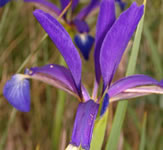

In [16]:
Image(filename=datapath+'/iris.jpg') 

In [17]:
!find .. -name "iris.jpg"

../data/iris.jpg


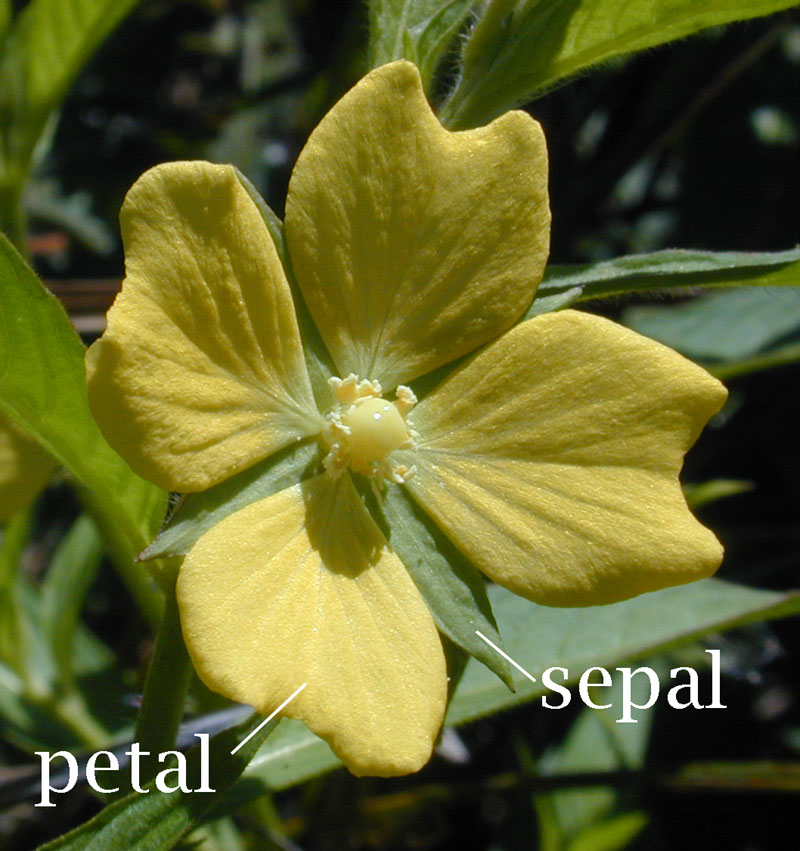

In [18]:
Image(filename=datapath+'/Petal-sepal.jpg', width=250)

In [19]:
ifname = datapath+'/iris.data' # ex: 5.6,2.9,3.6,1.3,Iris-versicolor
col_names = ['sepal_length_cm', 
             'sepal_width_cm', 
             'petal_length_cm', 
             'petal_width_cm',
             'label']
df = pd.read_csv(ifname, names=col_names)

In [20]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
type(df.iloc[:,2])  # => returns a series when the index is a single integer


pandas.core.series.Series

In [22]:
df.iloc[:,2]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length_cm, Length: 150, dtype: float64

In [23]:
df.iloc[[0]] # => returns a data-frame, because the index is a list ('[0]')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,label
0,5.1,3.5,1.4,0.2,Iris-setosa


In [24]:
type(df.iloc[0])

pandas.core.series.Series

In [25]:
# slice row first, then column.  list slices include start, but not stop,
# i.e. col_names[0:4] = [col_names[0], col_names[1], col_names[2], col_names[3]]
x_data = df.loc[:, col_names[0:4]].to_numpy() 
y_data = df.loc[:, 'label'].to_numpy()

In [26]:
x_data.shape

(150, 4)

Text(0, 0.5, 'sepal_width_cm')

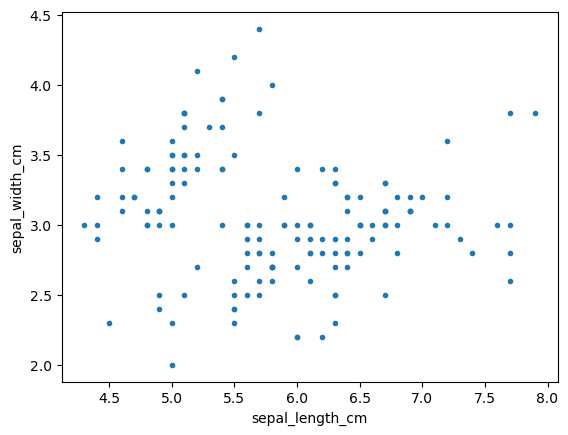

In [27]:
plt.plot(x_data[:,0], x_data[:,1], '.') # [:,0] selects every row, 0th column
plt.xlabel(col_names[0])
plt.ylabel(col_names[1])

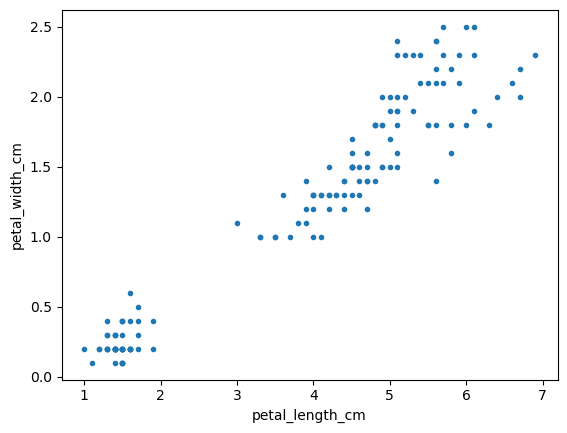

In [28]:
plt.plot(x_data[:,2], x_data[:,3], '.') # [:,0] selects every row, 0th column
plt.xlabel(col_names[2])
plt.ylabel(col_names[3]);

It's worth noting here that the petal length and width are pretty correlated, so they may give us mostly the same information.  
   
Now we'll separate the classes and plot them with different colors

In [29]:
print("Labels are {:}".format(np.unique(df["label"])))

Labels are ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


We can select parts of the data frame with conditions.  You can also combine conditions like this:   
```data[(data["cell n"] == 39) & (data["WL"]==7)]```

In [30]:
x_setosa = df[df["label"] == 'Iris-setosa'].to_numpy()
x_versicolor = df[df["label"] == 'Iris-versicolor'].to_numpy()
x_virginica = df[df["label"] == 'Iris-virginica'].to_numpy()

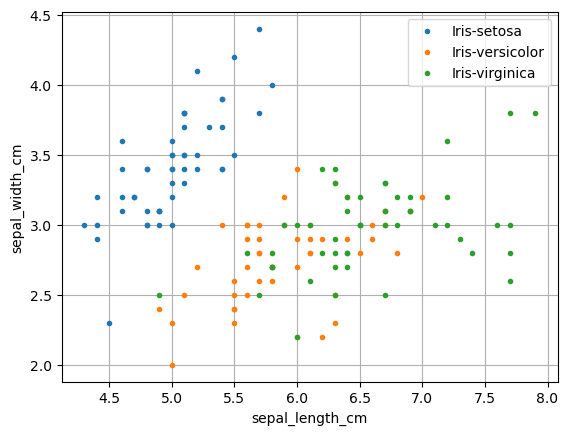

In [31]:
fids = [0,1] # feature indices
plt.plot(x_setosa[:,fids[0]], x_setosa[:,fids[1]], '.',
        x_versicolor[:,fids[0]], x_versicolor[:,fids[1]], '.',
        x_virginica[:,fids[0]], x_virginica[:,fids[1]], '.',) 
plt.xlabel(col_names[fids[0]])
plt.ylabel(col_names[fids[1]])

plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid(True)

_Iris setosa_ is linearly separable with sepal width and length, but _Versicolor_ and _Virginica_ are not.  We can try to draw a line separating _Setosa_ from the others, just by eyeballing data.  The slope is about 1 and the y is about 2.5 cm less than x here.  So we'll plot a function $y = x - 2.5$.

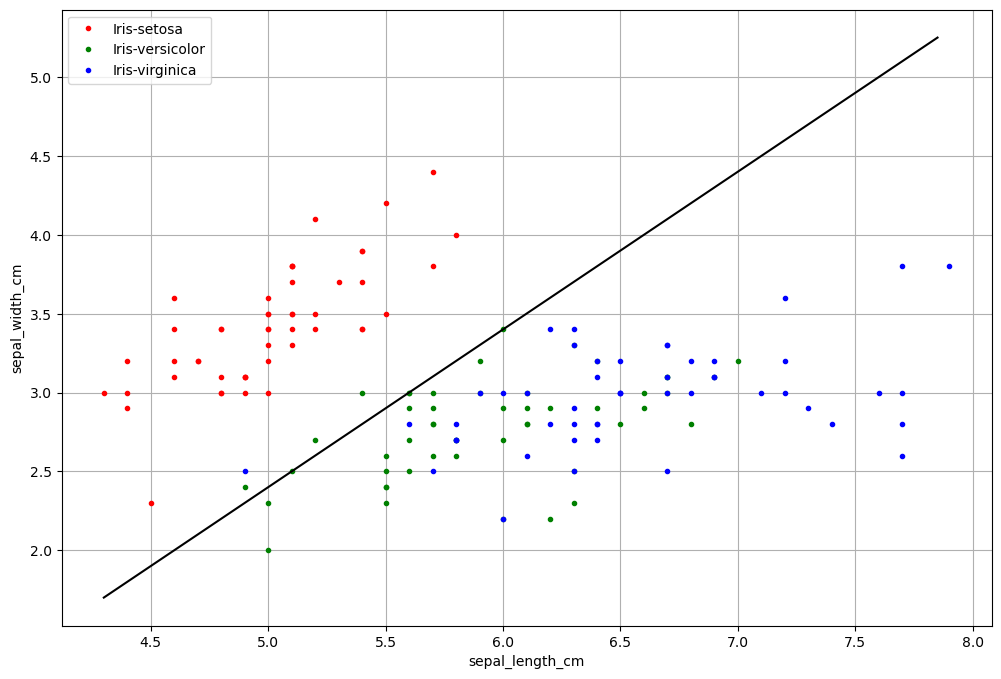

In [32]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
sl_range = np.arange(np.min(x_data[:,0]), np.max(x_data[:,0]), .05)
sw_line = sl_range-2.6
fids = [0,1] # feature indices
plt.plot(x_setosa[:,fids[0]], x_setosa[:,fids[1]], '.r',
        x_versicolor[:,fids[0]], x_versicolor[:,fids[1]], '.g',
        x_virginica[:,fids[0]], x_virginica[:,fids[1]], '.b',
        sl_range, sw_line, '-k') 
plt.xlabel(col_names[fids[0]])
plt.ylabel(col_names[fids[1]])

plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid(True)

Now we can change from plotting a line to building an indicator function:
\begin{align}
y &= x - 2.3 \\
y &> x - 2.3 \\
y - x + 2.3 &> 0 \\
\mbox{sepal_width} - \mbox{sepal_length} + 2.3 &> 0  \\
\end{align}

In [33]:
def is_setosa(feat_vec): # takes numpy array (sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm',)
    # return feat_vec[1] - feat_vec[0] + 2.3 > 0
    return feat_vec[1] - 1*feat_vec[0] + 2.6 > 0



In [34]:
idx = 1
print("Record number {:d} is a {:}".format(idx, df.iloc[idx,4])) # {:d} can be formatted like printf %d/x/f/etc.
estimate = is_setosa(df.iloc[idx,0:4].to_numpy())
correct = estimate == (df.iloc[idx,4] == 'Iris-setosa')
print(f"Is it a setosa? We think {estimate}.")  # note f-string; different way of formatting a string
if correct:
    print('Our estimate was correct.')
else:
    print("Our estimate was wrong")
    

Record number 1 is a Iris-setosa
Is it a setosa? We think True.
Our estimate was correct.


In [35]:
count_correct = 0
count_total = 0
for i,row in df.iterrows():
    est = is_setosa(row[0:4])
    count_total += 1
    correct = (est == (row[4] == 'Iris-setosa'))
    if correct:
        count_correct += 1
print(f"We got {count_correct} out of {count_total} correct.")

We got 143 out of 150 correct.


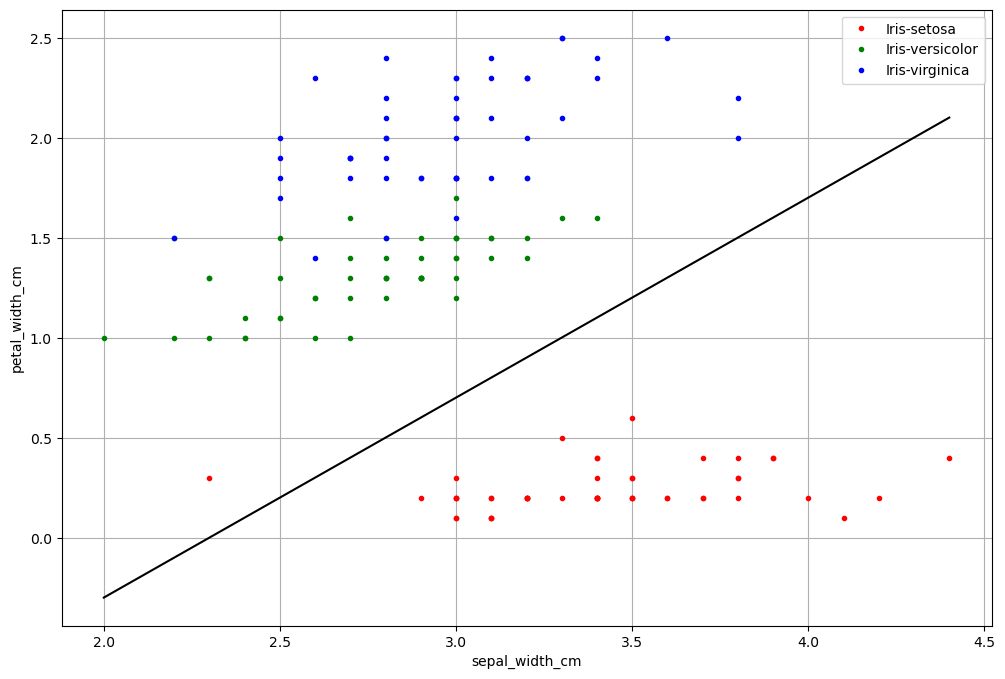

In [36]:
fids = [1,3] # feature indices

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
x_cut = np.arange(np.min(x_data[:,fids[0]]), np.max(x_data[:,fids[0]]), .05)
y_cut = x_cut-2.3

plt.plot(x_setosa[:,fids[0]], x_setosa[:,fids[1]], '.r',
        x_versicolor[:,fids[0]], x_versicolor[:,fids[1]], '.g',
        x_virginica[:,fids[0]], x_virginica[:,fids[1]], '.b')

plt.plot(x_cut, y_cut, '-k') 
plt.xlabel(col_names[fids[0]])
plt.ylabel(col_names[fids[1]])

plt.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'])
plt.grid(True)

In [37]:
(200.*500./(200.+500.))


142.85714285714286

In [38]:
20*142.8/(20+142.8)

17.542997542997544

In [39]:
.2*20


4.0

In [40]:
.2*17.5

3.5